
# **IMAGENET - VGG16 - NESNE TANIMA**


---



**Colab** için kimlik doğrulama adımları:

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


**Google Drive** içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:

In [2]:
import os 
os.chdir("/gdrive/My Drive/NesneTanima/")

In [3]:
!ls

drive			 ResNet50_NesneTanima_ImageNet.ipynb
Fashion_MNIST_CNN.ipynb  save_models
images			 VGG16_NesneTanima.ipynb


### Kütüphane Kurulumu

In [4]:
!pip3 install -q keras

**ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır.**

*On milyondan fazla etiketli resim bulunmaktadır.*

**ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız**


![alt text](https://github.com/hnarayanan/artistic-style-transfer/raw/05c95e5ac7001201d1ae9bf734a9224cf3445388/notebooks/images/imagenet-sample.jpg)



**Keras kütüphanesinden import edilmesi gerekenler: VGG16 eğitilmiş modeli**

In [5]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.



**Keras'ta önceden ImageNet veri kümesinde eğitilmiş  bir modeli yükleme **

In [6]:
model = VGG16(weights = 'imagenet', include_top=True)

553467904/553467096 [==============================] - 17s 0us/step


**Model yapısına bir göz atalım**: Hangi katmanlar var ve katmanların özellikleri neler...

In [8]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28,

**Toplam parametre sayısı da bize fikir verebilir** 

In [9]:
model.count_params()

138357544

**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**

In [10]:
import os
os.chdir("/gdrive/My Drive/NesneTanima/images")

In [11]:
!ls

bb.jpeg    drive    inek.jpg	 olips3.jpeg  van-kedisi.jpg
betty.jpg  f16.jpg  olips2.jpeg  olips.jpeg


**Bir test resmi yükleyelim ve ön işlemler yapalım**

*   f16
*   inek
*  Van kedisi
*  Olips 



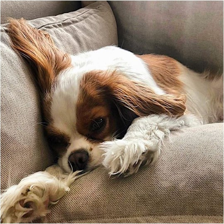

In [21]:
image_path = 'betty.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [22]:
x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

### **TEST GÖRÜNTÜSÜ İLE SINIFLAMA YAPMA**
<img align="left" width="200" height="200" src="https://cloud.githubusercontent.com/assets/532272/21507867/3376e9fe-cc4a-11e6-9350-7ec4f680da36.gif">



In [23]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

predicted: [('n02086646', 'Blenheim_spaniel', 0.99342394), ('n02085782', 'Japanese_spaniel', 0.0056090136), ('n02086910', 'papillon', 0.00027528973)]
Blenheim_spaniel
